# Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time 

# Confidence Interval

In [48]:
Population_N = 100000
Sample_size= 10000
Num_of_samples = 500 # This is number of times we take random 



In [59]:
population_value = np.random.random_sample((Population_N)) * 100
consolidated_sample_sets = []

for single_sample_set in range(Num_of_samples) :
    random_seed = np.random.randint(0,Num_of_samples*2)
    np.random.seed( random_seed )
    random_sub_sample = np.random.choice(population_value, size=Sample_size)
    consolidated_sample_sets.append(random_sub_sample) 


dataframe = pd.DataFrame(consolidated_sample_sets)
dataframe =dataframe.T
dataframe

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,84.687457,91.136367,60.294059,37.800287,75.484243,69.754898,73.572848,95.828153,88.561983,72.292594,...,16.909091,16.482308,56.084946,14.528522,61.496718,52.726033,43.171087,27.828770,86.885691,81.071223
1,86.364640,31.456265,64.031085,77.004019,66.705905,23.115910,14.445424,16.868315,56.164594,88.031762,...,35.603537,18.195225,31.642830,33.650833,12.210548,13.296354,52.335152,61.082096,11.072766,96.874572
2,26.581192,26.745203,98.407574,26.851938,48.468921,27.140518,38.572266,40.104625,91.203105,24.330550,...,34.947566,64.166458,62.233546,58.832508,55.199411,65.974713,88.969984,76.626306,66.444966,65.983204
3,21.269874,36.588277,8.752912,48.316526,55.407259,13.963206,93.094058,97.757347,42.120753,40.512845,...,5.337507,98.952342,8.711557,62.056673,7.520132,73.940935,50.459711,44.052021,86.410636,73.526911
4,39.837105,38.482004,55.345781,57.998078,75.730566,97.578124,27.285683,73.184278,6.018151,16.918853,...,44.242049,76.892166,50.583648,70.651002,26.805917,56.337892,57.282766,80.209448,45.366973,9.719260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,67.190674,76.659285,60.390638,87.331104,54.234139,34.014623,46.730556,76.861513,35.324114,87.106868,...,72.875095,96.350987,3.924270,4.522460,83.066919,18.650888,52.838285,0.109953,64.126828,66.484418
9996,80.773624,35.240172,25.219983,80.116936,35.585573,42.840877,18.802480,53.932292,26.981322,0.895247,...,66.894852,95.422365,0.115844,89.592736,84.760700,99.526069,24.511337,46.044853,98.522597,85.620965
9997,68.107951,87.271784,36.866915,2.091140,48.521372,25.054100,27.132827,40.842286,71.868128,84.667102,...,50.431084,26.242559,2.697361,29.702941,63.757774,22.886085,33.896077,44.420953,68.096555,22.308602
9998,48.002382,61.942880,30.203810,32.539277,33.520734,43.721875,36.013536,30.382062,14.787408,87.697649,...,34.530880,50.891181,75.877820,1.000276,32.069648,21.390076,75.307644,58.766539,69.767265,30.529127


<Axes: ylabel='Count'>

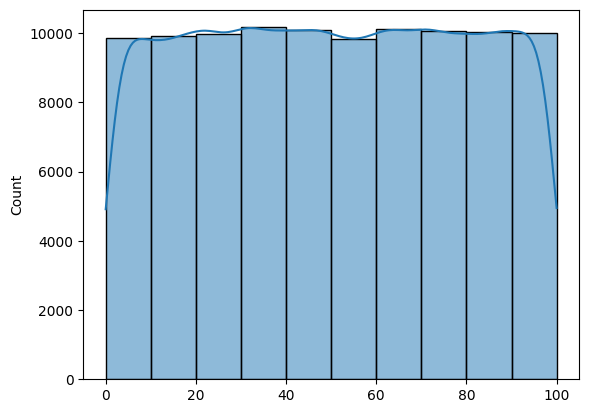

In [60]:
# histogram of all the population values

sns.histplot(population_value,bins=10,kde=True)

In [61]:
population_mean = np.mean(population_value)
population_mean 

50.08793009191307

In [62]:
## calculating mean of all the samples form individual independent distributions 
dataframe['rows_sum'] = dataframe.sum(axis=1)
dataframe


,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,rows_sum
0,84.687457,91.136367,60.294059,37.800287,75.484243,69.754898,73.572848,95.828153,88.561983,72.292594,...,16.482308,56.084946,14.528522,61.496718,52.726033,43.171087,27.828770,86.885691,81.071223,23394.560445
1,86.364640,31.456265,64.031085,77.004019,66.705905,23.115910,14.445424,16.868315,56.164594,88.031762,...,18.195225,31.642830,33.650833,12.210548,13.296354,52.335152,61.082096,11.072766,96.874572,18977.414124
2,26.581192,26.745203,98.407574,26.851938,48.468921,27.140518,38.572266,40.104625,91.203105,24.330550,...,64.166458,62.233546,58.832508,55.199411,65.974713,88.969984,76.626306,66.444966,65.983204,31528.956884
3,21.269874,36.588277,8.752912,48.316526,55.407259,13.963206,93.094058,97.757347,42.120753,40.512845,...,98.952342,8.711557,62.056673,7.520132,73.940935,50.459711,44.052021,86.410636,73.526911,25424.383996
4,39.837105,38.482004,55.345781,57.998078,75.730566,97.578124,27.285683,73.184278,6.018151,16.918853,...,76.892166,50.583648,70.651002,26.805917,56.337892,57.282766,80.209448,45.366973,9.719260,25894.713400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,67.190674,76.659285,60.390638,87.331104,54.234139,34.014623,46.730556,76.861513,35.324114,87.106868,...,96.350987,3.924270,4.522460,83.066919,18.650888,52.838285,0.109953,64.126828,66.484418,23559.019997
9996,80.773624,35.240172,25.219983,80.116936,35.585573,42.840877,18.802480,53.932292,26.981322,0.895247,...,95.422365,0.115844,89.592736,84.760700,99.526069,24.511337,46.044853,98.522597,85.620965,33823.479875
9997,68.107951,87.271784,36.866915,2.091140,48.521372,25.054100,27.132827,40.842286,71.868128,84.667102,...,26.242559,2.697361,29.702941,63.757774,22.886085,33.896077,44.420953,68.096555,22.308602,18680.654761
9998,48.002382,61.942880,30.203810,32.539277,33.520734,43.721875,36.013536,30.382062,14.787408,87.697649,...,50.891181,75.877820,1.000276,32.069648,21.390076,75.307644,58.766539,69.767265,30.529127,22387.384214


For a confidence level of 0.70:
Lower confidence limit: 47.80
Upper confidence limit: 49.92


<Axes: ylabel='Count'>

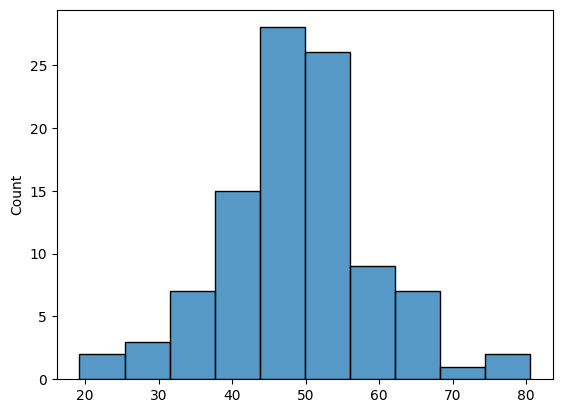

In [73]:
import numpy as np
from scipy import stats

def confidence_interval(data, confidence_level=0.95):
  """
  This function calculates the confidence interval limits for a given array.

  Args:
      data: A NumPy array of numerical data.
      confidence_level: The desired confidence level (between 0 and 1). Defaults to 0.95 (95%).

  Returns:
      A tuple containing the lower and upper confidence interval limits.
  """

  # Check for valid confidence level
  if confidence_level < 0 or confidence_level > 1:
    raise ValueError("Confidence level must be between 0 and 1")

  # Calculate the mean and standard deviation of the data
  mean = np.mean(data)
  std_dev = np.std(data)

  # Determine the appropriate t-value based on confidence level and sample size
  n = len(data)
  t_value = stats.t.ppf((1 + confidence_level) / 2, n - 1)

  # Calculate the margin of error
  margin_of_error = t_value * std_dev / np.sqrt(n)

  # Calculate the confidence interval limits
  lower_limit = mean - margin_of_error
  upper_limit = mean + margin_of_error

  return lower_limit, upper_limit

# Example usage
data = np.random.normal(loc=50, scale=10, size=100)  # Sample data with mean 50, std dev 10, size 100
confidence_level = 0.7

lower_limit, upper_limit = confidence_interval(data, confidence_level)

print(f"For a confidence level of {confidence_level:.2f}:")
print(f"Lower confidence limit: {lower_limit:.2f}")
print(f"Upper confidence limit: {upper_limit:.2f}")
data 
sns.histplot(data,bins=10)

<Axes: xlabel='rows_sum', ylabel='Count'>

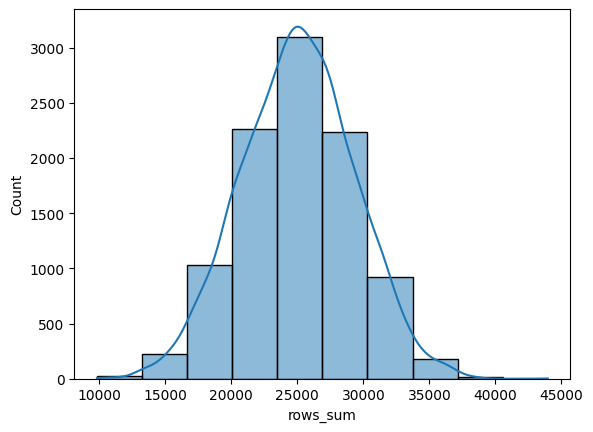

In [66]:
sns.histplot(dataframe['rows_sum'],bins=10, kde=True)

In [64]:
## converting the mean into standard normal distribution
sample_means_mean = np.mean(dataframe['rows_sum'])
sample_means_variance = np.var(dataframe['rows_sum'])


dataframe['stdzd_mean'] = (dataframe['rows_sum'] - sample_means_mean) 
dataframe['stdzd_mean'] = dataframe['stdzd_mean'] / sample_means_variance

dataframe

,0,1,2,3,4,5,6,7,8,9,...,492,493,494,495,496,497,498,499,rows_sum,stdzd_mean
0,84.687457,91.136367,60.294059,37.800287,75.484243,69.754898,73.572848,95.828153,88.561983,72.292594,...,56.084946,14.528522,61.496718,52.726033,43.171087,27.828770,86.885691,81.071223,23394.560445,-0.000089
1,86.364640,31.456265,64.031085,77.004019,66.705905,23.115910,14.445424,16.868315,56.164594,88.031762,...,31.642830,33.650833,12.210548,13.296354,52.335152,61.082096,11.072766,96.874572,18977.414124,-0.000328
2,26.581192,26.745203,98.407574,26.851938,48.468921,27.140518,38.572266,40.104625,91.203105,24.330550,...,62.233546,58.832508,55.199411,65.974713,88.969984,76.626306,66.444966,65.983204,31528.956884,0.000351
3,21.269874,36.588277,8.752912,48.316526,55.407259,13.963206,93.094058,97.757347,42.120753,40.512845,...,8.711557,62.056673,7.520132,73.940935,50.459711,44.052021,86.410636,73.526911,25424.383996,0.000020
4,39.837105,38.482004,55.345781,57.998078,75.730566,97.578124,27.285683,73.184278,6.018151,16.918853,...,50.583648,70.651002,26.805917,56.337892,57.282766,80.209448,45.366973,9.719260,25894.713400,0.000046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,67.190674,76.659285,60.390638,87.331104,54.234139,34.014623,46.730556,76.861513,35.324114,87.106868,...,3.924270,4.522460,83.066919,18.650888,52.838285,0.109953,64.126828,66.484418,23559.019997,-0.000080
9996,80.773624,35.240172,25.219983,80.116936,35.585573,42.840877,18.802480,53.932292,26.981322,0.895247,...,0.115844,89.592736,84.760700,99.526069,24.511337,46.044853,98.522597,85.620965,33823.479875,0.000475
9997,68.107951,87.271784,36.866915,2.091140,48.521372,25.054100,27.132827,40.842286,71.868128,84.667102,...,2.697361,29.702941,63.757774,22.886085,33.896077,44.420953,68.096555,22.308602,18680.654761,-0.000344
9998,48.002382,61.942880,30.203810,32.539277,33.520734,43.721875,36.013536,30.382062,14.787408,87.697649,...,75.877820,1.000276,32.069648,21.390076,75.307644,58.766539,69.767265,30.529127,22387.384214,-0.000144


<Axes: xlabel='stdzd_mean', ylabel='Count'>

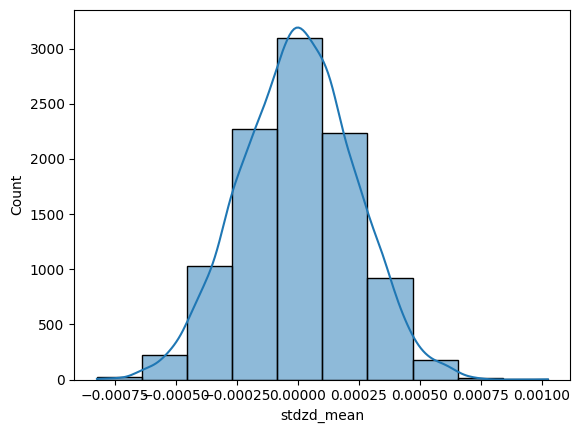

In [65]:
sns.histplot(dataframe['stdzd_mean'],bins=10,kde=True)

In [74]:
import numpy as np
from scipy import stats

def confidence_interval(data, confidence_level=0.95):
  """
  This function calculates the confidence interval limits for a given array.

  Args:
      data: A NumPy array of numerical data.
      confidence_level: The desired confidence level (between 0 and 1). Defaults to 0.95 (95%).

  Returns:
      A tuple containing the lower and upper confidence interval limits.
  """

  # Check for valid confidence level
  if confidence_level < 0 or confidence_level > 1:
    raise ValueError("Confidence level must be between 0 and 1")

  # Calculate the mean and standard deviation of the data
  mean = np.mean(data)
  std_dev = np.std(data)

  # Determine the appropriate t-value based on confidence level and sample size
  n = len(data)
  t_value = stats.t.ppf((1 + confidence_level) / 2, n - 1)

  # Calculate the margin of error
  margin_of_error = t_value * std_dev / np.sqrt(n)

  # Calculate the confidence interval limits
  lower_limit = mean - margin_of_error
  upper_limit = mean + margin_of_error

  return lower_limit, upper_limit

# Define parameters
population_mean = 50  # True population mean (assumed)
population_std_dev = 10  # True population standard deviation (assumed)
sample_size = 30  # Size of each random sample
num_samples = 100  # Number of random samples to draw
confidence_level = 0.95

# Generate random samples
samples = np.random.normal(loc=population_mean, scale=population_std_dev, size=(num_samples, sample_size))

# Calculate confidence intervals for each sample
confidence_intervals = []
for sample in samples:
  lower_limit, upper_limit = confidence_interval(sample)
  confidence_intervals.append((lower_limit, upper_limit))

# Analyze confidence interval coverage (optional)
num_covered = 0
for lower, upper in confidence_intervals:
  if population_mean >= lower and population_mean <= upper:
    num_covered += 1

coverage_rate = num_covered / num_samples * 100

# Print results
print(f"Population Mean (assumed): {population_mean:.2f}")
print(f"Population Std Dev (assumed): {population_std_dev:.2f}")
print(f"Sample Size: {sample_size}")
print(f"Number of Samples: {num_samples}")
print(f"Confidence Level: {confidence_level:.2f}")
print(f"Confidence Interval Coverage Rate: {coverage_rate:.2f}%")


Population Mean (assumed): 50.00
Population Std Dev (assumed): 10.00
Sample Size: 30
Number of Samples: 100
Confidence Level: 0.95
Confidence Interval Coverage Rate: 95.00%
